In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import requests
from io import BytesIO
from Validations import *
from tensorflow.keras.optimizers import Adam

## Step 1: Load the CIFAR-10 Dataset

The CIFAR-10 dataset is directly available in TensorFlow/Keras.<br>
Your Task: print the train_images, train_labels, test_images, test_labels shapes.<br>
Replace the none with the corresponding command.

<details>
    <summary>Click for a hint</summary>
    <p>You can print the shapes using "---.shape" command</p>
</details>

In [5]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

In [6]:
# Extracting dimensions and shapes
train_shape = train_images.shape
num_train_images = train_shape[0]
train_image_height = train_shape[1]
train_image_width = train_shape[2]
train_channels = train_shape[3]

test_shape = test_images.shape
num_test_images = test_shape[0]
test_image_height = test_shape[1]
test_image_width = test_shape[2]
test_channels = test_shape[3]

num_classes = len(class_names)

validate_dataset_info(train_shape, num_train_images, train_image_height, train_image_width, train_channels, 
                      test_shape, num_test_images, test_image_height, test_image_width, test_channels, 
                      num_classes, train_images, test_images, train_labels,test_labels, class_names)

All dataset dimensions are as expected. Good job!
Training images shape: (50000, 32, 32, 3) meaning that we have 50000 training images, each image is of shape 32x32, in 3 channels
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3) meaning that we have 10000 test images, each image is of shape 32x32, in 3 channels
Test labels shape: (10000, 1)
Number of classes: 10 and they are: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


## Step 2: Explore the Dataset

Visualization: Display a few images from the dataset. </br>
Here we display few plots each one shows us the date in diffrent way.

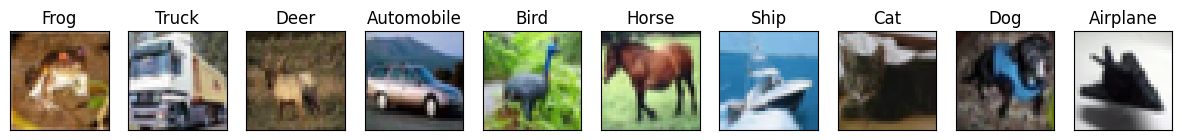

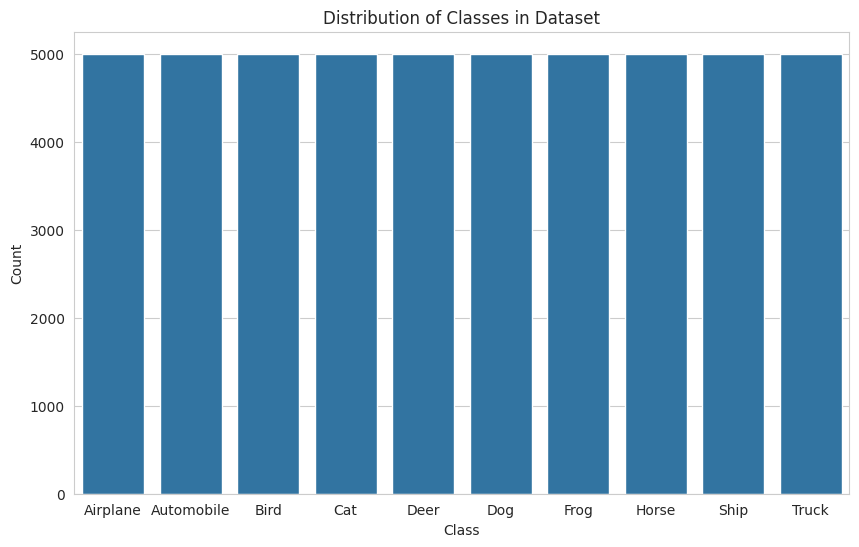

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 1.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 10.130883
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.375549
[t-SNE] KL divergence after 1000 iterations: 2.879644


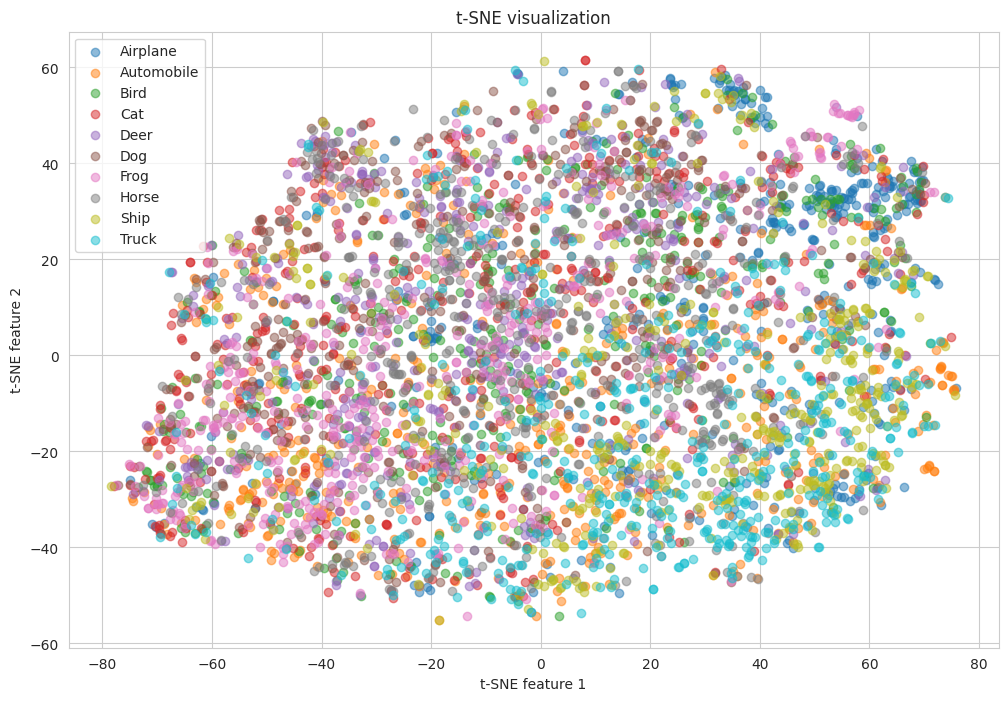

In [7]:
images_to_display, labels_to_display = find_unique_images(train_images, train_labels, class_names)

# Plot sample images
plot_sample_images(images_to_display, labels_to_display, class_names)

# Plot class distribution
plot_class_distribution(train_labels, class_names)

# Plot high-dimensional data by reducing it to two dimensions
plot_tsne(train_images, train_labels, class_names)

## Step 3: Preprocess the Data

### 3.1 
Your Task: Change the images types from int8 to float32.</br>
Replace the None with the correct function in parameter that it takes so that it will change the type.</br>
You can do so by using the ".astype(---)" command which take a <b>string</b> of the desired type.

<details>
    <summary>Click for a hint</summary>
    <p>You need to use " = train_images.astype("type_to_convert")" </p>
</details>

In [8]:
print(f"The traning type: {str(train_images.dtype)}, The testing type: {str(test_images.dtype)}.")

The traning type: uint8, The testing type: uint8.


In [9]:
train_images_32 = train_images.astype("float32")
test_images_32 = test_images.astype("float32")

In [10]:
print(validate_type(train_images_32,test_images_32))

Type changed succefully!


### 3.2 
<b>Note:</b> Pixel values are usually range between 0-255, when 0 is black and 255 is white.</br>
<img src="https://what-when-how.com/wp-content/uploads/2012/07/tmp26dc25_thumb2.png" width="300" hight="150"> </br>
By normalizing, we decrease the gap of the pixels values and compress them.</br> 
This allows the model to work better since the whitest value is not as far from the darkest value. (instead 0-255 we will have 0-1). </br></br>
Your Task: Normalize the data to be between 0-1.</br>
Replace the None with the correct value that need to dived by.</br>

<details>
    <summary>Click for a hint</summary>
    <p>To normalize a value that is in the rage 0-1000 to 0-1 we need to divied by the max value in our range, that is 1000. </br>
        Exmaple: min value - 0/1000 = 0, mid value - 500/1000 = 0.5, max value - 1000/1000 = 1. </p>
</details>

In [12]:
# Normalize the image pixel values by dividing by 255
train_images_norm = train_images_32/255
test_images_norm =  test_images_32/255

# This will print the minimum and maximum values of the training set
print(validate_norm_rage(train_images_norm,test_images_norm))
print("Normalized training set min value:", train_images_norm.min())
print("Normalized training set max value:", test_images_norm.max())

Normalization succeeded
Normalized training set min value: 0.0
Normalized training set max value: 1.0


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 1.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 10.123097
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.677948
[t-SNE] KL divergence after 1000 iterations: 2.861180


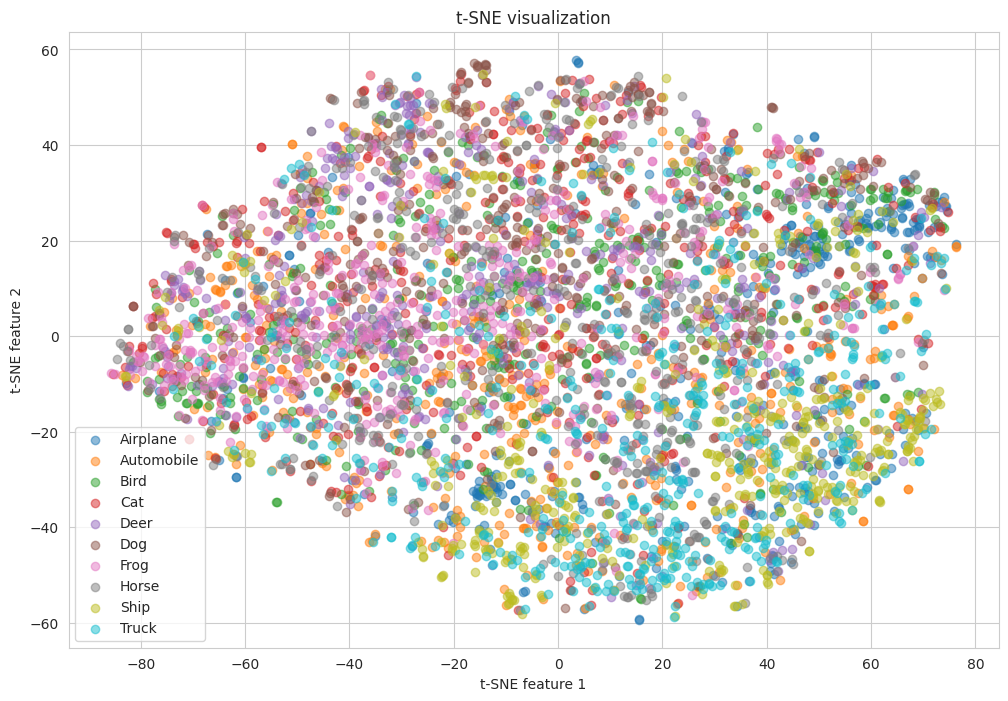

In [14]:
plot_tsne(train_images_norm, train_labels, class_names)

## Step 4: Build the Neural Network Model
Your Task: Build the layers of the network.</br>
Replace the None with the correct valusy.

<details>
    <summary>Click for a hint</summary>
    <p>In the input layer (first Conv2D) the input shape should be the (width,hight,channels) of a single img </br>
        In the output layer (last Dense) should be the number of classes.</p>
</details>

In [15]:
model = Sequential()

# First convolutional layer with MaxPooling
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(None, None, None)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer with MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer

# Third convolutional layer with MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer

# Flatten the output to feed into a DNN
model.add(Flatten())

# Dense layer with 64 units
model.add(Dense(64, activation='relu'))

# Output layer with 10 units (one per class) and softmax activation
# model.add(Dense(None, activation='softmax'))
model.add(Dense(10, activation='softmax'))

# Print the model summary to check the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

## Step 5: Compile the Model
Compile the model with an optimizer, loss function, and metrics

In [16]:
adam_optimizer = Adam(learning_rate=0.0001)  # Example: Setting learning rate to 0.0001

model.compile(optimizer=adam_optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print a message to confirm model compilation
print("Model compiled successfully.")

Model compiled successfully.


## Step 6: Train the Model
Your Task: Train the model. For traning the model we will use the ".fit()" function which takes the train images and their labels.</br>
Replace the None with the correct values.

In [17]:

epochs = 70

# Train the model
# history = model.fit(None, None, epochs=epochs)
history = model.fit(train_images_norm, train_labels, batch_size=12, epochs=epochs, validation_data=(test_images_norm, test_labels))

# Print a message to indicate the end of training
print("Model training completed.")

Epoch 1/70
4167/4167 [==============================] - 26s 6ms/step - loss: 1.8545 - accuracy: 0.3079 - val_loss: 1.5828 - val_accuracy: 0.4271
Epoch 2/70
4167/4167 [==============================] - 32s 8ms/step - loss: 1.5572 - accuracy: 0.4326 - val_loss: 1.4708 - val_accuracy: 0.4790
Epoch 3/70
4167/4167 [==============================] - 28s 7ms/step - loss: 1.4470 - accuracy: 0.4785 - val_loss: 1.3585 - val_accuracy: 0.5220
Epoch 4/70
4167/4167 [==============================] - 28s 7ms/step - loss: 1.3618 - accuracy: 0.5124 - val_loss: 1.2686 - val_accuracy: 0.5542
Epoch 5/70
4167/4167 [==============================] - 28s 7ms/step - loss: 1.3060 - accuracy: 0.5355 - val_loss: 1.2245 - val_accuracy: 0.5750
Epoch 6/70
4167/4167 [==============================] - 28s 7ms/step - loss: 1.2558 - accuracy: 0.5562 - val_loss: 1.1873 - val_accuracy: 0.5880
Epoch 7/70
4167/4167 [==============================] - 28s 7ms/step - loss: 1.2152 - accuracy: 0.5703 - val_loss: 1.1315 - val_ac

## Step 7: Evaluate the Model

Your Task: Evaluate the model on the test dataset. For testing the model we will use the ".evaluate()" function which takes the test images and test labels.</br>
Replace the None with the correct values.

In [18]:

# test_loss, test_accuracy = model.evaluate(None, None)
_, test_accuracy = model.evaluate(test_images_norm, test_labels)

# Print the test dataset accuracy
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.6784 - accuracy: 0.7663
Test accuracy: 0.7663000226020813


## Improvment
Try to play with the numbers of epochs to get a better "accuracy" results.

## Step 8: Test it yourself!

Your Task: Find an image of one classes and test the model</br>
Replace the None with the correct values.

1/1 [==============================] - 0s 99ms/step


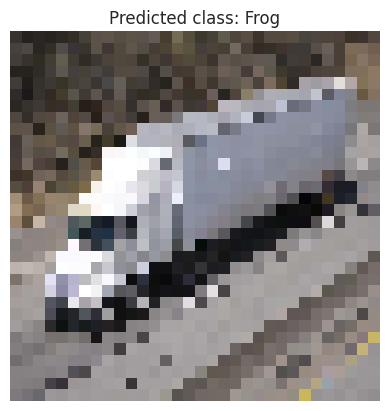

In [19]:
# URL of the image to predict
image_url = 'https://cdn.britannica.com/17/126517-004-020A33AA/semi-semitrailer-truck-tractor-highway.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_url)
# Predict the image
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display the image and prediction
plt.imshow(img_array[0])
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()